# ライブラリ　インポート

In [1]:
# NumPy
import numpy as np

# Dataframe operations
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Models
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.linear_model import Perceptron
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
!pip install rgf_python
from rgf.sklearn import RGFClassifier
from sklearn.neural_network import MLPClassifier

# Cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score #スコア評価
from sklearn.model_selection import cross_val_predict #予測
from sklearn.model_selection import cross_validate

# GridSearchCV
from sklearn.model_selection import GridSearchCV

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix


import numpy as np
import pandas as pd
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# -----------------------------------
# ニューラルネットのパラメータチューニングのためのパッケージ
# -----------------------------------
from hyperopt import hp
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import ReLU, PReLU
from keras.layers.core import Dense, Dropout
# from keras.layers.normalization import BatchNormalization #outdate not nomalization
from keras.layers import BatchNormalization
from keras.models import Sequential
# from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler

from hyperopt import fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import log_loss

# tensorflowの警告抑制
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
# このセルを実行したあとどうすればいいかがわからない方は、別途配布している。GoogleColabにおけるドライブのマウントの仕方、と、Google Drive上でのフォルダ構造の説明のpdfファイルをご覧ください。

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# KNN



## データ　インポート

In [4]:
# JupyterLabなどローカルで作業する場合
# 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
# データの読み込み方がわからない方は、別途配布している。GoogleColabにおけるドライブのマウントの仕方、と、Google Drive上でのフォルダ構造の説明のpdfファイルをご覧ください。

path = "/content/drive/My Drive/matsuo lab/competition_1/"

train_df = pd.read_csv(path + 'data/train.csv')
test_df = pd.read_csv(path + 'data/test.csv')
# train_data = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/train.csv')
# test_data = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/test.csv')

data_df = train_df.append(test_df) # The entire data: train + test.

train_df

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
path = "/content/drive/My Drive/matsuo lab/competition_1/"

train_df = pd.read_csv(path + 'data/train.csv')
test_df = pd.read_csv(path + 'data/test.csv')
# train_data = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/train.csv')
# test_data = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/test.csv')

data_df = train_df.append(test_df) # The entire data: train + test.

train_df

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 　EDA

In [6]:
data_df['Title'] = data_df['Name']
# Cleaning name and extracting Title
for name_string in data_df['Name']:
    data_df['Title'] = data_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# Replacing rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(title)]
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute
    
# Substituting Age values in train_df and test_df:
train_df['Age'] = data_df['Age'][:891]
test_df['Age'] = data_df['Age'][891:]

# Dropping Title feature
data_df.drop('Title', axis = 1, inplace = True)

In [7]:
data_df['Family_Size'] = data_df['Parch'] + data_df['SibSp'] + 1

# Substituting Age values in train_df and test_df:
train_df['Family_Size'] = data_df['Family_Size'][:891]
test_df['Family_Size'] = data_df['Family_Size'][891:]

In [8]:
data_df['Last_Name'] = data_df['Name'].apply(lambda x: str.split(x, ",")[0])
data_df['Fare'].fillna(data_df['Fare'].mean(), inplace=True)

DEFAULT_PERISHED_VALUE = 0.5
data_df['Family_Perished'] = DEFAULT_PERISHED_VALUE

for grp, grp_df in data_df[['Perished','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Perished'].max()
            smin = grp_df.drop(ind)['Perished'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Perished'] = 1
            elif (smin==0.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Perished'] = 0

print("Number of passengers with family perished information:", 
      data_df.loc[data_df['Family_Perished']!=0.5].shape[0])

Number of passengers with family perished information: 420


In [9]:
for _, grp_df in data_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Perished'] == 0) | (row['Family_Perished']== 0.5):
                smax = grp_df.drop(ind)['Perished'].max()
                smin = grp_df.drop(ind)['Perished'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Perished'] = 1
                elif (smin==0.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Perished'] = 0
                        
print("Number of passenger with family/group Perished information: " 
      +str(data_df[data_df['Family_Perished']!=0.5].shape[0]))

# # Family_Perished in train_df and test_df:
train_df['Family_Perished'] = data_df['Family_Perished'][:891]
test_df['Family_Perished'] = data_df['Family_Perished'][891:]

Number of passenger with family/group Perished information: 546


In [10]:
data_df['Fare'].fillna(data_df['Fare'].median(), inplace = True)

# Making Bins
data_df['FareBin'] = pd.qcut(data_df['Fare'], 5)

label = LabelEncoder()
data_df['FareBin_Code'] = label.fit_transform(data_df['FareBin'])

train_df['FareBin_Code'] = data_df['FareBin_Code'][:891]
test_df['FareBin_Code'] = data_df['FareBin_Code'][891:]

train_df.drop(['Fare'], 1, inplace=True)
test_df.drop(['Fare'], 1, inplace=True)

In [11]:
data_df['AgeBin'] = pd.qcut(data_df['Age'], 4)

label = LabelEncoder()
data_df['AgeBin_Code'] = label.fit_transform(data_df['AgeBin'])

train_df['AgeBin_Code'] = data_df['AgeBin_Code'][:891]
test_df['AgeBin_Code'] = data_df['AgeBin_Code'][891:]

train_df.drop(['Age'], 1, inplace=True)
test_df.drop(['Age'], 1, inplace=True)

In [12]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

train_df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], axis = 1, inplace = True)
test_df.drop(['Name','PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], axis = 1, inplace = True)

In [13]:
train_df

,Perished,Pclass,Sex,Family_Size,Family_Perished,FareBin_Code,AgeBin_Code
0,1,3,0,2,0.5,0,0
1,0,1,1,2,0.5,4,3
2,0,3,1,1,0.5,1,1
3,0,1,1,2,1.0,4,2
4,1,3,0,1,0.5,1,2
...,...,...,...,...,...,...,...
886,1,2,0,1,0.5,2,1
887,0,1,1,1,0.5,3,0
888,1,3,1,4,1.0,3,0
889,0,1,0,1,0.5,3,1


In [14]:
train_x_knn = train_df.drop('Perished', 1)
train_y = train_df['Perished']
test_x_knn = test_df.copy()

# train_x_nn = train_df.drop('Perished', 1)
# train_y = train_df['Perished']
# test_x_nn = test_df.copy()

# train_x_die = train_df.drop('Perished', 1)
# train_y = train_df['Perished']
# test_x_die = test_df.copy()

In [15]:
std_scaler = StandardScaler()
train_x_knn = std_scaler.fit_transform(train_x_knn)
# train_y = std_scaler.fit_trainform(train_y) 目的変数は標準化しなくていい
test_x_knn = std_scaler.transform(test_x_knn)

# std_scaler = StandardScaler()
# train_x_nn = std_scaler.fit_transform(train_x_nn)
# # train_y = std_scaler.fit_trainform(train_y) 目的変数は標準化しなくていい
# test_x_nn = std_scaler.transform(test_x_nn)

# std_scaler = StandardScaler()
# train_x_die = std_scaler.fit_transform(train_x_die)
# # train_y = std_scaler.fit_trainform(train_y) 目的変数は標準化しなくていい
# test_x_die = std_scaler.transform(test_x_die)

In [16]:
# Cross-validation
# from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import cross_validate

In [17]:
# knnによるモデル
class Model1knn:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = KNeighborsClassifier(algorithm='auto', leaf_size=11, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=14, weights='uniform')

        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

    def confusion_matrix(self, x):
        pred = self.model.predict(x)
        return pred


class Model1rf:

    def __init__(self):
        self.model = None
        self.scaler = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = RandomForestClassifier(criterion='gini',
                                        n_estimators=1750,
                                        max_depth=7,
                                        min_samples_split=6,
                                        min_samples_leaf=6,
                                        max_features='auto',
                                        oob_score=True,
                                        random_state=42,
                                        n_jobs=-1,
                                        verbose=1
                                        )
      
        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred
    
    def confusion_matrix(self, x):
        pred = self.model.predict(x)
        return pred

# xgboostによるモデル
class Model1Xgb:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        params = {'objective': 'binary:logistic', 'silent': 1, 'random_state': 71,
                  'eval_metric': 'logloss'}
        num_round = 10
        dtrain = xgb.DMatrix(tr_x, label=tr_y)
        dvalid = xgb.DMatrix(va_x, label=va_y)
        watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
        self.model = xgb.train(params, dtrain, num_round, evals=watchlist)

    def predict(self, x):
        data = xgb.DMatrix(x) #dtest = xgb.DMatrix(test_x)
        pred = self.model.predict(data)
        return pred

    def confusion_matrix(self, x):
        data = xgb.DMatrix(x) #dtest = xgb.DMatrix(test_x)
        pred = self.model.predict(data)
        pred = np.where(pred<0.5, 0, 1) #二値分類に対しての確率ではなく、１の確率の値しかないときにwhereを使う　predict_proba()[:, 1]のとき        
        return pred


class Model1SVC:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = svm.SVC(kernel='rbf',C=1,gamma=0.1, probability=True)
        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

    def confusion_matrix(self, x):
        pred = self.model.predict(x)
        return pred


class Model1NB:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = GaussianNB()
        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

    def confusion_matrix(self, x):
        pred = self.model.predict(x)
        return pred


# ニューラルネットによるモデル
class Model1NN:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        batch_size = 128
        epochs = 10
        model = Sequential()
        model.add(Dense(256, activation='relu', input_shape=(tr_x.shape[1],)))
        model.add(Dropout(0.2))
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam')

        history = model.fit(tr_x, tr_y,
                            batch_size=batch_size, epochs=epochs,
                            verbose=1, validation_data=(va_x, va_y))
        self.model = model

    def predict(self, x):
        print(x)
        pred = self.model.predict(x).reshape(-1) #reshape(-1)で１次元で返す
        print(pred)
        print(pred.shape)
        return pred

    def confusion_matrix(self, x):
        pred = self.model.predict(x)
        pred = np.where(pred<0.5, 0, 1) #二値分類に対しての確率ではなく、１の確率の値しかないときにwhereを使う　predict_proba()[:, 1]のとき
        return pred

class Model1MLP:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = MLPClassifier(hidden_layer_sizes=(100, 100, 10), random_state=0)
        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

    def confusion_matrix(self, x):
        pred = self.model.predict(x)
        return pred

class Model1LSVC:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = svm.SVC(kernel='linear',C=1,gamma=0.1, probability=True)
        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

    def confusion_matrix(self, x):
        pred = self.model.predict(x)
        return pred

class Model1Linear:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = LogisticRegression(solver='lbfgs', C=1.0)
        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

    def confusion_matrix(self, x):
        pred = self.model.predict(x)
        return pred



class Model1Linear:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = LogisticRegression(solver='lbfgs', C=1.0)
        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

    def confusion_matrix(self, x):
        pred = self.model.predict(x)
        return pred

class Model1Rgf:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = regressor = RGFClassifier(max_leaf=300, algorithm="RGF_Sib", test_interval=100, loss="LS")
        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        pred = self.model.predict_proba(x)[:, 1]
        return pred

    def confusion_matrix(self, x):
        pred = self.model.predict(x)
        return pred

In [18]:
def predict_cv(model, train_x, train_y, test_x):
    preds = []
    plot_preds = []
    preds_test = []
    va_idxes = []

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=71)

    # クロスバリデーションで学習・予測を行い、予測値とインデックスを保存する
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x, train_y), 1):
        tr_x, va_x = train_x[tr_idx], train_x[va_idx]
        tr_y, va_y = train_y[tr_idx], train_y[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)

        plot_pred = model.confusion_matrix(va_x) #→モデルの中のコンフュージョンマトリックスという関数である。↓と同じ意味を示すような関数になっている
        #→plot_pred = clf.predict(va_x)
        plot_preds.append(plot_pred)

        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)


    # バリデーションデータに対する予測値を連結し、その後元の順序に並べ直す
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    # テストデータに対する予測値の平均をとる
    preds_test = np.mean(preds_test, axis=0)
    

    # confusion_matrixについて
    f,ax=plt.subplots(1,1,figsize=(12,10))
    plot_preds = np.concatenate(plot_preds, axis=0) #上記と同じように、バリデーションデータに対する予測値を連結し、その後元の順序に並べ直さなければいけない
    plot_preds = plot_preds[order]
    sns.heatmap(confusion_matrix(train_y, plot_preds), annot=True,fmt='2.0f').set_title(model) #  →これで、ｋｆで予測したva_yの塊とtrain_yのconfusion_matrixができる


    return pred_train, preds_test

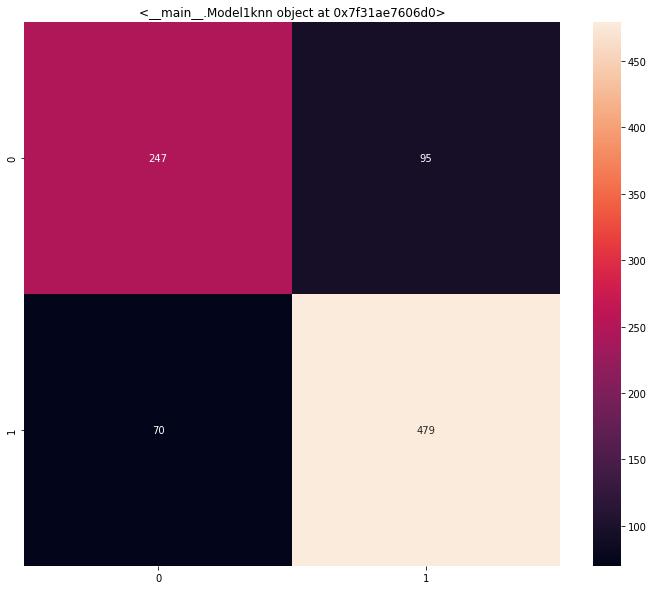

In [19]:
model_1k = Model1knn()
pred_train_1k, pred_test_1k = predict_cv(model_1k, train_x_knn, train_y, test_x_knn)

# model_1n = Model1NN()
# pred_train_1n, pred_test_1n = predict_cv(model_1n, train_x_nn, train_y, test_x_nn)

# model_1rgf = Model1Rgf()
# pred_train_1rgf, pred_test_1rgf = predict_cv(model_1rgf, train_x_die, train_y, test_x_die)

# model_1x = Model1Xgb()
# pred_train_1x, pred_test_1x = predict_cv(model_1x, train_x_die, train_y, test_x_die)

# model_1svc = Model1SVC()
# pred_train_1svc, pred_test_1svc = predict_cv(model_1svc, train_x_die, train_y, test_x_die)

# model_1lsvc = Model1LSVC()
# pred_train_1lsvc, pred_test_1lsvc = predict_cv(model_1lsvc, train_x_die, train_y, test_x_die)

# model_1m = Model1MLP()
# pred_train_1m, pred_test_1m = predict_cv(model_1m, train_x_die, train_y, test_x_die)

# model_1lr = Model1Linear()
# pred_train_1lr, pred_test_1lr = predict_cv(model_1lr, train_x_die, train_y, test_x_die)

# model_1nb = Model1NB()
# pred_train_1nb, pred_test_1nb = predict_cv(model_1nb, train_x_die, train_y, test_x_die)

# model_1r = Model1rf()
# pred_train_1r, pred_test_1r = predict_cv(model_1r, train_x_die, train_y, test_x_die)

In [20]:
pred_test_1k

array([0.87142857, 0.45714286, 0.91428571, 0.92857143, 0.        ,
       0.82857143, 0.34285714, 0.6       , 0.25714286, 0.65714286,
       0.92857143, 0.77142857, 0.05714286, 0.88571429, 0.02857143,
       0.2       , 0.85714286, 0.94285714, 0.75714286, 0.42857143,
       0.57142857, 0.91428571, 0.05714286, 0.55714286, 0.        ,
       0.91428571, 0.07142857, 0.77142857, 0.77142857, 0.84285714,
       0.78571429, 0.94285714, 0.57142857, 0.52857143, 0.65714286,
       0.94285714, 0.28571429, 0.8       , 0.92857143, 0.65714286,
       0.94285714, 0.51428571, 0.95714286, 0.05714286, 0.        ,
       0.92857143, 0.77142857, 0.77142857, 0.        , 0.05714286,
       0.65714286, 0.88571429, 0.        , 0.17142857, 0.88571429,
       0.94285714, 0.88571429, 0.77142857, 0.51428571, 0.        ,
       0.82857143, 0.82857143, 0.94285714, 0.25714286, 0.38571429,
       0.07142857, 0.28571429, 0.91428571, 0.42857143, 0.15714286,
       0.34285714, 0.82857143, 0.48571429, 0.51428571, 0.     

In [ ]:
# n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
# algorithm = ['auto']
# weights = ['uniform', 'distance']
# leaf_size = list(range(1,50,5))
# hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
#                'n_neighbors': n_neighbors}
# gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
#                 cv=10, scoring = "roc_auc")
# gd.fit(train_x_knn, train_y)
# print(gd.best_score_)
# print(gd.best_estimator_)


#https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

#Choose all predictors except target & IDcols
# predictors = [x for x in train.columns if x not in [target, IDcol]]
# param_test1 = {'n_estimators':range(20,81,10)}
# gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
# param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch1.fit(train[predictors],train[target])

In [ ]:
# MLP　グリッドサーチ

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# # results = []
# results1 = []
# for hidden_layer_sizes in [10, 100, 1000]:
#     for solver in ['sgd', 'adam', 'lbfgs']:
#         for activation in ['identity', 'logistic', 'tanh', 'relu']:
#             for learning_rate_init in [0.1, 0.01, 0.001]:
#                 clf = MLPClassifier(max_iter=10000,
#                       hidden_layer_sizes=(hidden_layer_sizes,), 
#                       activation=activation, solver=solver,
#                       learning_rate_init=learning_rate_init, verbose=True)
                
#                 #cross_val_score
#                 scores = cross_val_score(clf, X=train_x_knn, y=train_y, cv=skf)
#                 average_score = scores.mean()
#                 average_score
#                 results1.append([hidden_layer_sizes, activation,
#                       solver, learning_rate_init, average_score])

# RandomForest

## データ　インポート

In [72]:
def concat_df(train_data, test_data):
  
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):

    return all_data.loc[:890], all_data.loc[891:].drop(['Perished'], axis=1)

In [73]:
path = "/content/drive/My Drive/matsuo lab/competition_1/"
df_train = pd.read_csv(path + 'data/train.csv')
df_test = pd.read_csv(path + 'data/test.csv')

df_all = concat_df(df_train, df_test)

In [74]:
dfs = [df_train, df_test]

## EDA

In [75]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [76]:
# Filling the missing values in Embarked with C
df_all['Embarked'] = df_all['Embarked'].fillna('C')

In [77]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Perished,Sex,SibSp,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,NaN,male,0,3701


In [78]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

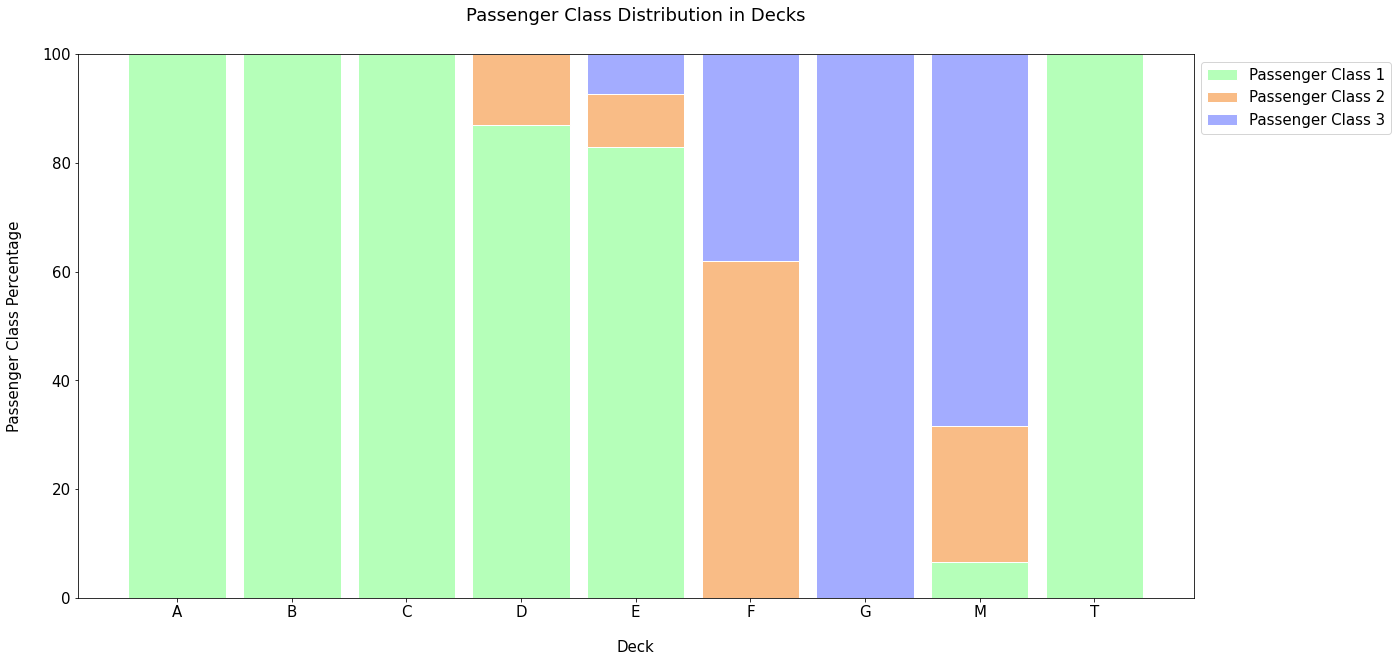

In [79]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Perished', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

In [80]:
# Passenger in the T deck is changed to A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

In [81]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [82]:
# Dropping the Cabin feature
df_all.drop(['Cabin'], inplace=True, axis=1)

df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]

In [83]:
print('df_all shape: {}'.format(df_all.shape))
print('df_train shape: {}'.format(df_train.shape))
print('df_test shape: {}'.format(df_test.shape))

df_all shape: (1309, 12)
df_train shape: (891, 12)
df_test shape: (418, 11)


In [84]:
df_all = concat_df(df_train, df_test)
df_all.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Perished,Sex,SibSp,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1.0,male,1,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0.0,female,1,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0.0,female,0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0.0,female,1,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,1.0,male,0,373450


In [85]:
print('df_all shape: {}'.format(df_all.shape))
print('df_train shape: {}'.format(df_train.shape))
print('df_test shape: {}'.format(df_test.shape))

df_all shape: (1309, 12)
df_train shape: (891, 12)
df_test shape: (418, 11)


In [86]:
df_all

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Perished,Sex,SibSp,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1.0,male,1,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0.0,female,1,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0.0,female,0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0.0,female,1,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,1.0,male,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,M,S,8.0500,"Spector, Mr. Woolf",0,1305,3,NaN,male,0,A.5. 3236
1305,39.0,ABC,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,NaN,female,0,PC 17758
1306,38.5,M,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,NaN,male,0,SOTON/O.Q. 3101262
1307,25.0,M,S,8.0500,"Ware, Mr. Frederick",0,1308,3,NaN,male,0,359309


In [87]:
df_all = concat_df(df_train, df_test)
df_all.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Perished,Sex,SibSp,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1.0,male,1,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0.0,female,1,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0.0,female,0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0.0,female,1,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,1.0,male,0,373450


In [88]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

In [89]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

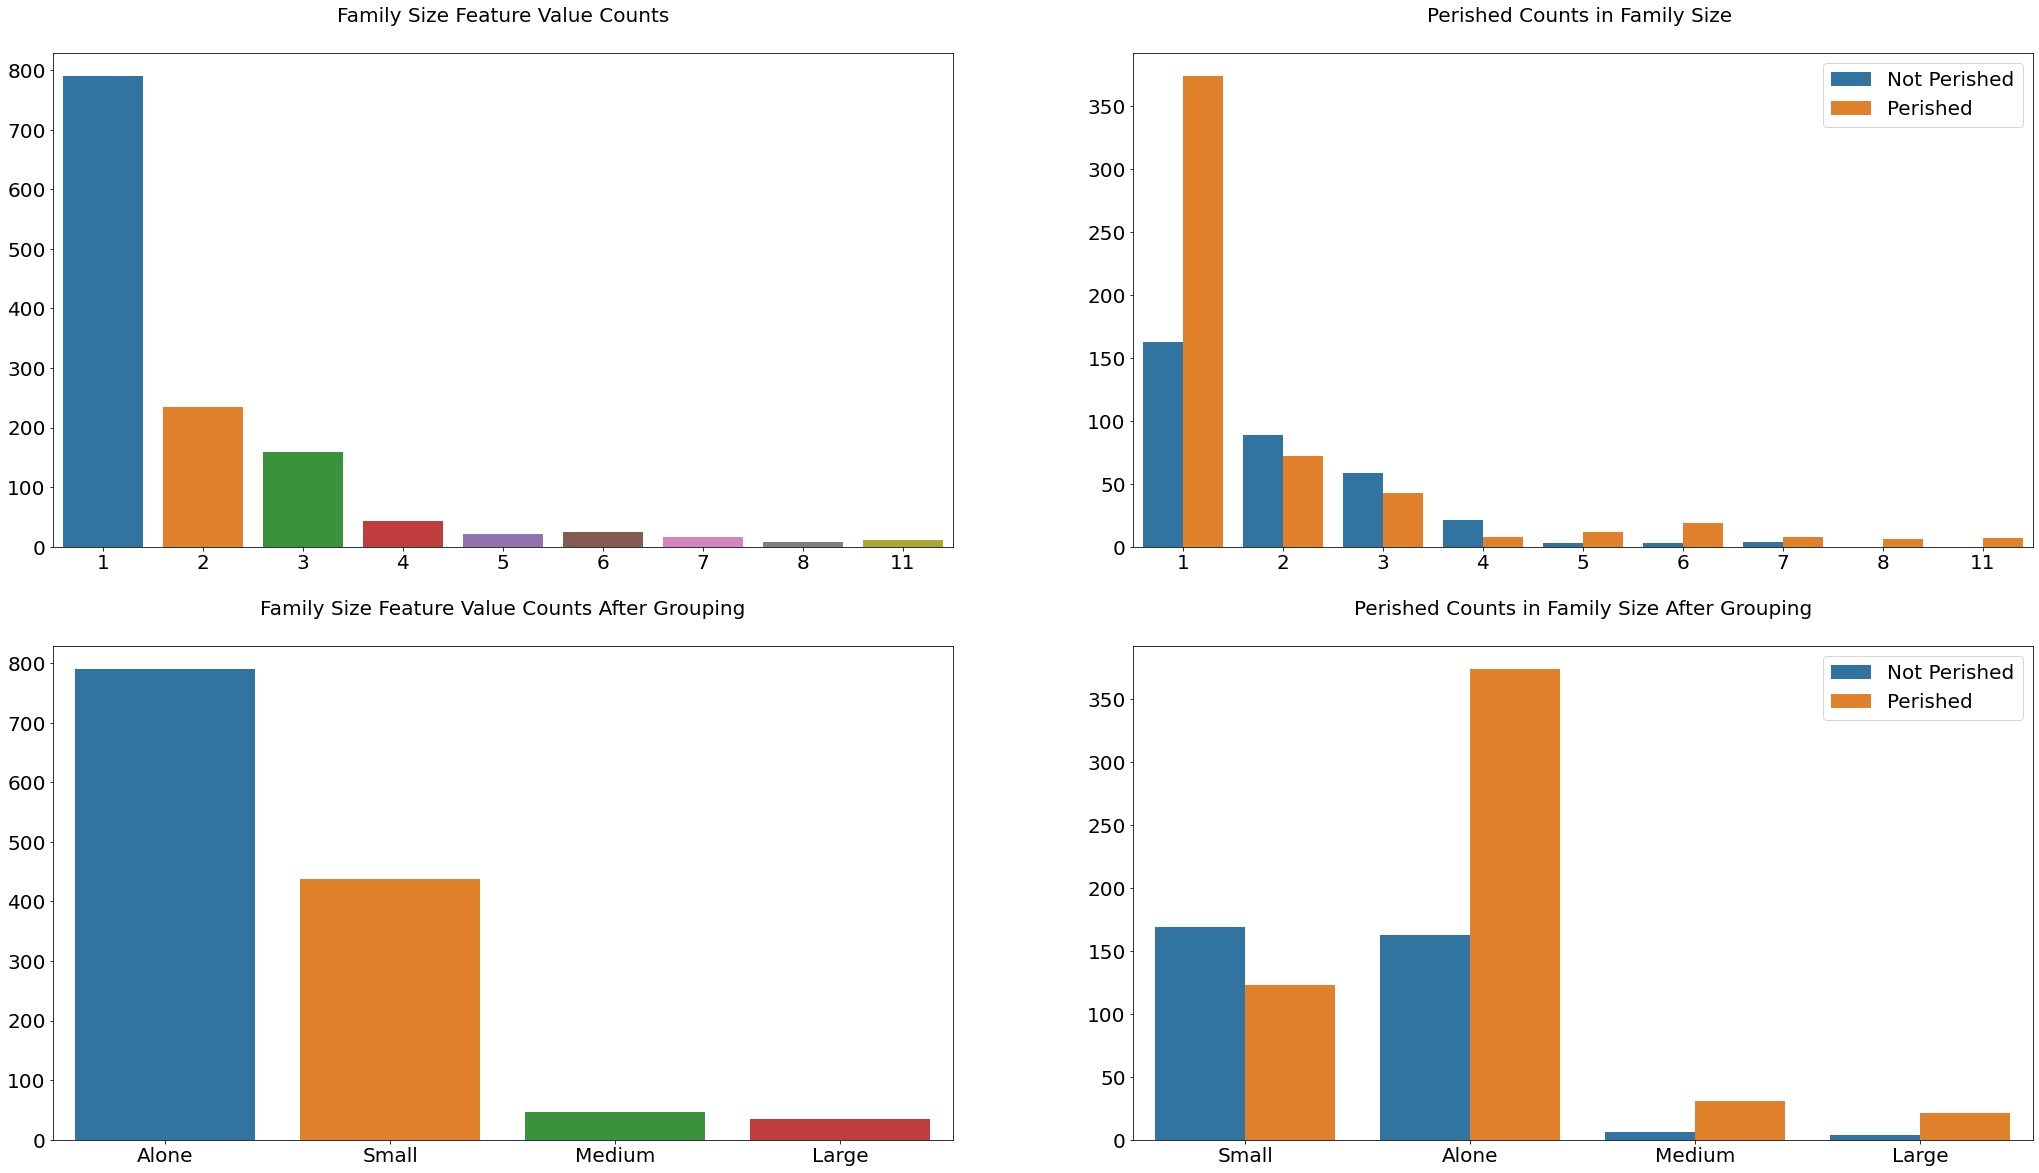

In [90]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Perished', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Perished Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 9:'Large', 10: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Perished', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Perished Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Perished', 'Perished'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

In [91]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

In [92]:
df_all['Title'] = df_all['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [93]:
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df_all.replace({'Title': mapping}, inplace=True)

df_all[['Title', 'Perished']].groupby(['Title'], as_index=False).mean()

,Title,Perished
0,Dr,0.571429
1,Master,0.425000
2,Miss,0.295699
3,Mr,0.840000
4,Mrs,0.204724
5,Rev,1.000000


In [94]:
# df_all['Title'] = df_all['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
# 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# df_all['Title'] = df_all['Title'].replace('Mlle', 'Miss')
# df_all['Title'] = df_all['Title'].replace('Ms', 'Miss')
# df_all['Title'] = df_all['Title'].replace('Mme', 'Mrs')

# df_all[['Title', 'Perished']].groupby(['Title'], as_index=False).mean()

In [95]:
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

In [96]:
pd.crosstab(df_all['Title'], df_all['Sex'])

Sex,female,male
Title,,
Dr,1,7
Master,0,61
Miss,265,0
Mr,0,767
Mrs,200,0
Rev,0,8


In [97]:
df_all

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Perished,Sex,SibSp,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,"(21.0, 22.0]",M,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,1.0,male,1,A/5 21171,2,Small,1,Mr,0
1,"(34.0, 40.0]",ABC,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0.0,female,1,PC 17599,2,Small,2,Mrs,1
2,"(25.0, 26.0]",M,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,0.0,female,0,STON/O2. 3101282,1,Alone,1,Miss,0
3,"(34.0, 40.0]",ABC,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0.0,female,1,113803,2,Small,2,Mrs,1
4,"(34.0, 40.0]",M,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,1.0,male,0,373450,1,Alone,1,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,"(22.0, 25.0]",M,S,"(7.896, 8.05]","Spector, Mr. Woolf",0,1305,3,NaN,male,0,A.5. 3236,1,Alone,1,Mr,0
1305,"(34.0, 40.0]",ABC,C,"(83.475, 512.329]","Oliva y Ocana, Dona. Fermina",0,1306,1,NaN,female,0,PC 17758,1,Alone,3,Mrs,1
1306,"(34.0, 40.0]",M,S,"(-0.001, 7.25]","Saether, Mr. Simon Sivertsen",0,1307,3,NaN,male,0,SOTON/O.Q. 3101262,1,Alone,1,Mr,0
1307,"(22.0, 25.0]",M,S,"(7.896, 8.05]","Ware, Mr. Frederick",0,1308,3,NaN,male,0,359309,1,Alone,1,Mr,0


In [98]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

In [99]:
df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

In [100]:
print('df_all shape: {}'.format(df_all.shape))
print('df_train shape: {}'.format(df_train.shape))
print('df_test shape: {}'.format(df_test.shape))

df_all shape: (1309, 18)
df_train shape: (891, 18)
df_test shape: (418, 18)


In [101]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_Perished_rate = df_train.groupby('Family')['Perished', 'Family','Family_Size'].median()
df_ticket_Perished_rate = df_train.groupby('Ticket')['Perished', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_Perished_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_Perished_rate.index[i] in non_unique_families and df_family_Perished_rate.iloc[i, 1] > 1:
        family_rates[df_family_Perished_rate.index[i]] = df_family_Perished_rate.iloc[i, 0]

for i in range(len(df_ticket_Perished_rate)):
    # Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_Perished_rate.index[i] in non_unique_tickets and df_ticket_Perished_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_Perished_rate.index[i]] = df_ticket_Perished_rate.iloc[i, 0]

In [102]:
mean_Perished_rate = np.mean(df_train['Perished'])

train_family_Perished_rate = []
train_family_Perished_rate_NA = []
test_family_Perished_rate = []
test_family_Perished_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_Perished_rate.append(family_rates[df_train['Family'][i]])
        train_family_Perished_rate_NA.append(1)
    else:
        train_family_Perished_rate.append(mean_Perished_rate)
        train_family_Perished_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_Perished_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_Perished_rate_NA.append(1)
    else:
        test_family_Perished_rate.append(mean_Perished_rate)
        test_family_Perished_rate_NA.append(0)
        
df_train['Family_Perished_Rate'] = train_family_Perished_rate
df_train['Family_Perished_Rate_NA'] = train_family_Perished_rate_NA
df_test['Family_Perished_Rate'] = test_family_Perished_rate
df_test['Family_Perished_Rate_NA'] = test_family_Perished_rate_NA

train_ticket_Perished_rate = []
train_ticket_Perished_rate_NA = []
test_ticket_Perished_rate = []
test_ticket_Perished_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_Perished_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_Perished_rate_NA.append(1)
    else:
        train_ticket_Perished_rate.append(mean_Perished_rate)
        train_ticket_Perished_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_Perished_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_Perished_rate_NA.append(1)
    else:
        test_ticket_Perished_rate.append(mean_Perished_rate)
        test_ticket_Perished_rate_NA.append(0)
        
df_train['Ticket_Perished_Rate'] = train_ticket_Perished_rate
df_train['Ticket_Perished_Rate_NA'] = train_ticket_Perished_rate_NA
df_test['Ticket_Perished_Rate'] = test_ticket_Perished_rate
df_test['Ticket_Perished_Rate_NA'] = test_ticket_Perished_rate_NA

In [103]:
for df in [df_train, df_test]:
    df['Perished_Rate'] = (df['Ticket_Perished_Rate'] + df['Family_Perished_Rate']) / 2
    df['Perished_Rate_NA'] = (df['Ticket_Perished_Rate_NA'] + df['Family_Perished_Rate_NA']) / 2  

In [104]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Dr,0,1
Master,0,21
Miss,79,0
Mr,0,242
Mrs,73,0
Rev,0,2


In [105]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

In [106]:
for df in dfs:
  print(pd.crosstab(df['Title'], df['Sex']))

Sex      0    1
Title          
0        1    6
1        0   40
2      186    0
3        0  525
4      127    0
5        0    6
Sex     0    1
Title         
0       0    1
1       0   21
2      79    0
3       0  242
4      73    0
5       0    2


In [107]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)

In [108]:
df_train

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Perished,Sex,SibSp,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Family,Family_Perished_Rate,Family_Perished_Rate_NA,Ticket_Perished_Rate,Ticket_Perished_Rate_NA,Perished_Rate,Perished_Rate_NA,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
0,2,3,2,0,"Braund, Mr. Owen Harris",0,1,3,1.0,1,1,A/5 21171,2,3,1,3,0,Braund,0.616162,0,0.616162,0,0.616162,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7,0,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0.0,0,1,PC 17599,2,3,2,4,1,Cumings,0.000000,1,0.000000,1,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4,3,2,3,"Heikkinen, Miss. Laina",0,3,3,0.0,0,0,STON/O2. 3101282,1,0,1,2,0,Heikkinen,0.616162,0,0.616162,0,0.616162,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7,0,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0.0,0,1,113803,2,3,2,4,1,Futrelle,0.616162,0,0.616162,0,0.616162,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,7,3,2,3,"Allen, Mr. William Henry",0,5,3,1.0,1,0,373450,1,0,1,3,0,Allen,0.616162,0,0.616162,0,0.616162,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5,3,2,5,"Montvila, Rev. Juozas",0,887,2,1.0,1,0,211536,1,0,1,5,0,Montvila,0.616162,0,0.616162,0,0.616162,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
887,1,0,2,9,"Graham, Miss. Margaret Edith",0,888,1,0.0,0,0,112053,1,0,1,2,0,Graham,0.616162,0,0.616162,0,0.616162,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
888,2,3,2,8,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,1.0,0,1,W./C. 6607,4,3,4,2,0,Johnston,1.000000,1,1.000000,1,1.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,4,0,0,9,"Behr, Mr. Karl Howell",0,890,1,0.0,1,0,111369,1,0,1,3,0,Behr,0.616162,0,0.616162,0,0.616162,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [109]:
df_test

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Perished,Sex,SibSp,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Family,Family_Perished_Rate,Family_Perished_Rate_NA,Ticket_Perished_Rate,Ticket_Perished_Rate_NA,Perished_Rate,Perished_Rate_NA,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
891,7,3,1,2,"Kelly, Mr. James",0,892,3,NaN,1,0,330911,1,0,1,3,0,Kelly,0.616162,0,0.616162,0,0.616162,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
892,8,3,2,0,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,NaN,0,1,363272,2,3,1,4,1,Wilkes,0.616162,0,0.616162,0,0.616162,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
893,9,3,1,4,"Myles, Mr. Thomas Francis",0,894,2,NaN,1,0,240276,1,0,1,3,0,Myles,0.616162,0,0.616162,0,0.616162,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
894,5,3,2,4,"Wirz, Mr. Albert",0,895,3,NaN,1,0,315154,1,0,1,3,0,Wirz,0.616162,0,0.616162,0,0.616162,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
895,2,3,2,5,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,NaN,0,1,3101298,3,3,2,4,1,Hirvonen,0.000000,1,0.000000,1,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,3,2,3,"Spector, Mr. Woolf",0,1305,3,NaN,1,0,A.5. 3236,1,0,1,3,0,Spector,0.616162,0,0.616162,0,0.616162,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1305,7,0,0,12,"Oliva y Ocana, Dona. Fermina",0,1306,1,NaN,0,0,PC 17758,1,0,3,4,1,Oliva y Ocana,0.616162,0,0.500000,1,0.558081,0.5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1306,7,3,2,0,"Saether, Mr. Simon Sivertsen",0,1307,3,NaN,1,0,SOTON/O.Q. 3101262,1,0,1,3,0,Saether,0.616162,0,0.616162,0,0.616162,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1307,3,3,2,3,"Ware, Mr. Frederick",0,1308,3,NaN,1,0,359309,1,0,1,3,0,Ware,0.616162,0,0.616162,0,0.616162,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [110]:
print('df_all shape: {}'.format(df_all.shape))
print('df_train shape: {}'.format(df_train.shape))
print('df_test shape: {}'.format(df_test.shape))

df_all shape: (1309, 18)
df_train shape: (891, 46)
df_test shape: (418, 46)


In [111]:
df_all = concat_df(df_train, df_test) #dfsで作ったdf_trainとdf_testをconcat
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Perished',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Perished_Rate', 'Family_Perished_Rate', 'Ticket_Perished_Rate_NA', 'Family_Perished_Rate_NA']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4,Fare,Is_Married,Pclass_1,Pclass_2,Pclass_3,Perished_Rate,Perished_Rate_NA,Sex_1,Sex_2,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.0,0.0,1.0,0.616162,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11,1,1.0,0.0,0.0,0.000000,1.0,1.0,0.0,2,0.0,0.0,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,0.0,0.0,1.0,0.616162,0.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10,1,1.0,0.0,0.0,0.616162,0.0,1.0,0.0,2,0.0,0.0,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,0.0,0.0,1.0,0.616162,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0


In [112]:
print('df_all shape: {}'.format(df_all.shape))
print('df_train shape: {}'.format(df_train.shape))
print('df_test shape: {}'.format(df_test.shape))

df_all shape: (1309, 28)
df_train shape: (891, 46)
df_test shape: (418, 46)


In [113]:
train_x_rf = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
train_y = df_train['Perished'].values
test_x_rf = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

In [114]:
print('train_x_rf shape: {}'.format(train_x_rf.shape))
print('train_y shape: {}'.format(train_y.shape))
print('test_x_rf shape: {}'.format(test_x_rf.shape))

train_x_rf shape: (891, 28)
train_y shape: (891,)
test_x_rf shape: (418, 28)


In [115]:
train_x_rf

array([[-0.79767242, -1.55651393, -0.62440403, ..., -0.16990692,
        -0.20814785,  1.4322604 ],
       [ 0.90998286,  1.34816867, -0.06750314, ..., -0.16990692,
        -0.20814785,  1.4322604 ],
       [-0.11461031, -0.76432777, -0.62440403, ..., -0.16990692,
        -0.20814785, -0.69819706],
       ...,
       [-0.79767242,  0.55598251,  1.04629864, ..., -0.16990692,
        -0.20814785,  1.4322604 ],
       [-0.11461031,  0.82004456, -0.62440403, ..., -0.16990692,
        -0.20814785, -0.69819706],
       [ 0.5684518 , -1.29245188, -0.62440403, ..., -0.16990692,
        -0.20814785, -0.69819706]])

## Predict

In [116]:
def predict_cv(model, train_x, train_y, test_x):
    preds = []
    plot_preds = []
    preds_test = []
    va_idxes = []

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=71)

    # クロスバリデーションで学習・予測を行い、予測値とインデックスを保存する
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x, train_y), 1):
        tr_x, va_x = train_x[tr_idx], train_x[va_idx]
        tr_y, va_y = train_y[tr_idx], train_y[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)

        # confusion_matrixについて
        plot_pred = model.confusion_matrix(va_x) #→モデルの中のコンフュージョンマトリックスという関数である。↓と同じ意味を示すような関数になっている
        #→plot_pred = model.predict(va_x)
        plot_preds.append(plot_pred)


        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)


    # バリデーションデータに対する予測値を連結し、その後元の順序に並べ直す
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    # テストデータに対する予測値の平均をとる
    preds_test = np.mean(preds_test, axis=0)
    

    # confusion_matrixについて
    f,ax=plt.subplots(1,1,figsize=(12,10))
    # plot_pred = cross_val_predict(model,va_x,va_y,cv=10)
    # plot_pred = model.confusion_matrix(train_x)　 #←これが
    # plot_preds = np.where(preds<0.5, 0, 1)

    plot_preds = np.concatenate(plot_preds, axis=0) #上記と同じように、バリデーションデータに対する予測値を連結し、その後元の順序に並べ直さなければいけない
    plot_preds = plot_preds[order]
    sns.heatmap(confusion_matrix(train_y, plot_preds), annot=True,fmt='2.0f').set_title(model) #  →これで、ｋｆで予測したva_yの塊とtrain_yのconfusion_matrixができる


    return pred_train, preds_test

In [117]:
class Model1rf:

    def __init__(self):
        self.model = None
        self.scaler = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        # self.scaler = StandardScaler()
        # self.scaler.fit(tr_x)

        self.model = RandomForestClassifier(criterion='gini',
                                        n_estimators=1750,
                                        max_depth=7,
                                        min_samples_split=6,
                                        min_samples_leaf=6,
                                        max_features='auto',
                                        oob_score=True,
                                        random_state=42,
                                        n_jobs=-1,
                                        verbose=1
                                        )
      
        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        # x = self.scaler.transform(x)
        # pred = self.model.predict_proba(x)[;, 1] →下　と一緒なのに、なんかエラー出る
        pred = self.model.predict_proba(x)[:, 1]
        return pred


    def confusion_matrix(self, x):
        pred = self.model.predict(x)
        return pred

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

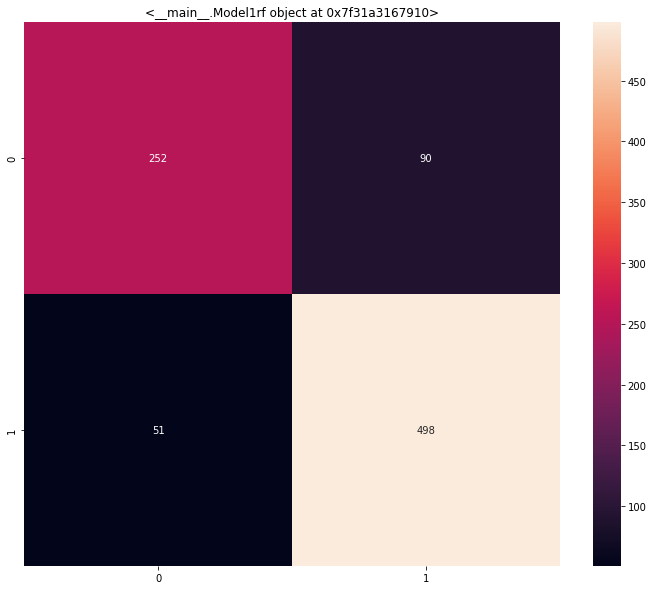

In [118]:
model_1r = Model1rf()
pred_train_1r, pred_test_1r = predict_cv(model_1r, train_x_rf, train_y, test_x_rf)

# 加重平均

In [127]:
y_pred_gd = pred_test_1k*0.25 + pred_test_1r*0.75

In [128]:
y_pred_gd = np.where(y_pred_gd<0.5, 0, 1) #二値分類に対しての確率ではなく、１の確率の値しかないときにwhereを使う　predict_proba()[:, 1]のとき

In [129]:
path = "/content/drive/My Drive/matsuo lab/competition_1/"
submission = pd.read_csv(path + 'gender_submission.csv')


In [130]:
submission['Perished'] = y_pred_gd
submission.to_csv("knn[.25]_rf[.75]_[.82].csv", index = False)